In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# All Activation Functions and their Transfer Derivatives

# 1. Sigmoid / Logistic Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

# 2. Rectified Linear Unit Function
def relu(x):
     return abs(x) * (x > 0)

def drelu(x):
     return 1. * (x > 0.)

# 3. Leaky-Relu Functions
def lrelu(x):
    return np.where(x > 0., x, x * 0.01)

def dlrelu(x):
    dx = np.ones_like(x)
    dx[x < 0.] = 0.01
    return dx

# 4. Hyperbolic Tan Function
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))

In [4]:
def feed_forward(data_in, w0,w1,w2, b):
  
    layer0 = data_in
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = np.dot(layer2, w2) + b

    return layer0, layer1, layer2, layer3

In [5]:
def back_propogation(i, layer0, layer1, layer2, layer3, actual_y, w0,w1,w2, b, learning_rate):
  
    
    op_delta = layer3 - actual_y
    dh3 = np.dot(layer2.T, op_delta)
    
    l2_error = op_delta.dot(w2.T)
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    b = b - (learning_rate * np.mean(op_delta))
   
    if i%50==0 and (i!=0):
        loss = np.mean(np.power(layer3-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print("\n", int(i), loss)

        
    return w0, w1,w2,b

In [7]:
data=pd.read_excel('Concrete_data.xls')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
X=pd.DataFrame(data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1))

In [9]:
Y=pd.DataFrame(data['Concrete compressive strength(MPa, megapascals) '])

In [10]:
X=(X-X.min())/(X.max()-X.min())
Y=(Y-Y.min())/(Y.max()-Y.min())

In [11]:
x=np.array(X)
y=np.array(Y)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
epochs = 150000
loss_curve=[]
iters=[]

In [14]:
np.random.seed(3)
w0=np.random.random((8,4))-1
w1=np.random.random((4,3))-1
w2=np.random.random((3,1))-1

b = np.random.random((1,1))

In [15]:
for i in range(epochs):
    layer0,layer1,layer2,layer3=feed_forward(x_train,w0,w1,w2,b)
    w0,w1,w2,b=back_propogation(i,layer0,layer1,layer2,layer3,y_train,w0,w1,w2,b,0.001)
    


 1000 0.04119468776112663

 2000 0.024645972637941518

 3000 0.016932454251992968

 4000 0.016351344984735436

 5000 0.015877918434356448

 6000 0.015205838700202545

 7000 0.01411411116674391

 8000 0.012573225631148176

 9000 0.011094541724768349

 10000 0.010186279051736198

 11000 0.009673753586639251

 12000 0.009335066624557723

 13000 0.009087950088561765

 14000 0.008899958899307912

 15000 0.008752686769054163

 16000 0.008633296501019004

 17000 0.008532377557575318

 18000 0.008443224896591647

 19000 0.008361328164406679

 20000 0.008283831451615641

 21000 0.008209038703476886

 22000 0.008136039650370061

 23000 0.008064451463245222

 24000 0.00799423207371388

 25000 0.007925529586091428

 26000 0.007858558177728918

 27000 0.007793507990644938

 28000 0.0077304960578616745

 29000 0.007669554771335386

 30000 0.007610645455132444

 31000 0.007553682724386488

 32000 0.007498558947964903

 33000 0.00744516338784084

 34000 0.007393394743130858

 35000 0.0073431680721334

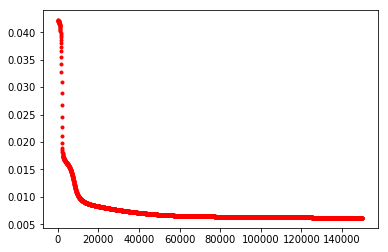

In [16]:
plt.plot(iters, loss_curve, 'r.')

In [17]:
np.sqrt(0.006183698171969011)

0.07863649389417747